In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [9]:
##Reading the dataSet
tg = pd.read_csv("NSE-TATAGLOBAL11.csv")

In [11]:
tg.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [16]:
tg.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [17]:
##Displaying the basics statistics about data
tg.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [ ]:
Sorting the Data

In [18]:
##Checking for Null Value
NAN = [(c,tg[c].isnull().mean()*100) for c in tg]
NAN = pd.DataFrame(NAN,columns=['column_name','percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Last,0.0
5,Close,0.0
6,Total Trade Quantity,0.0
7,Turnover (Lacs),0.0


In [20]:
srt = tg.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [21]:
srt.reset_index(inplace=True)
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [ ]:
Data Visualization

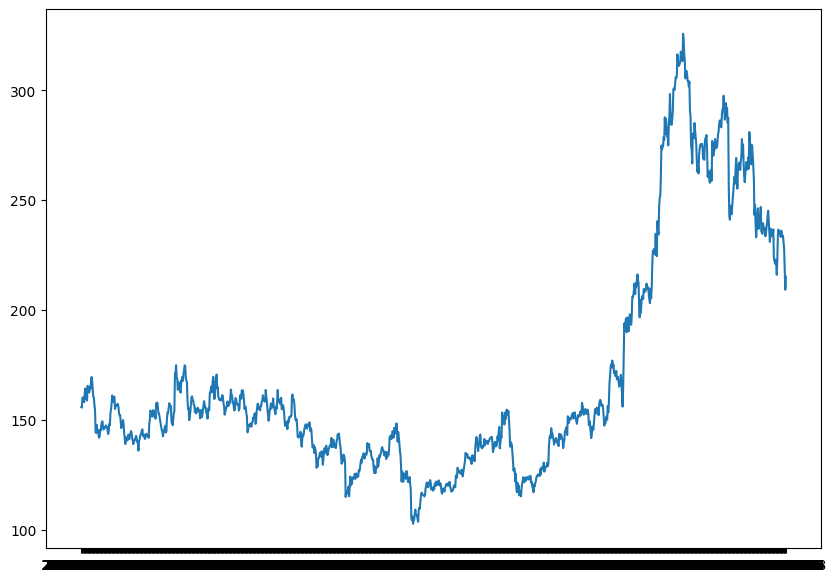

In [22]:
##Ploting the graph for the data and close
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [23]:
close_srt = srt['Close']
close_srt

0       155.80
1       155.55
2       160.15
3       160.05
4       159.45
         ...  
1230    230.90
1231    227.60
1232    218.20
1233    209.20
1234    215.15
Name: Close, Length: 1235, dtype: float64

In [ ]:
Feature Scaling(MinMax Scaler)

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
close_srt = scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [ ]:
Since LSTM are sensitive to the scale to the data, so we apply MinMax Scaler to transform our values between 0 and 1

In [27]:
##Splitting the dataset
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [28]:
train_data.shape

(864, 1)

In [29]:
test_data.shape

(371, 1)

In [34]:
##Convert an array of values into a dataset matrix 
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0] ###i=0, 0,1,2,3....99  100
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [35]:
##Reshaping the dataset
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [36]:
print(x_train.shape), print(y_train.shape)

(763, 100)
(763,)


(None, None)

In [37]:
print(x_test.shape), print(y_test.shape)

(270, 100)
(270,)


(None, None)

In [38]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [39]:
x_train

array([[[0.23823398],
        [0.2371134 ],
        [0.25773196],
        ...,
        [0.17279247],
        [0.16651726],
        [0.16606903]],

       [[0.2371134 ],
        [0.25773196],
        [0.25728373],
        ...,
        [0.16651726],
        [0.16606903],
        [0.14926042]],

       [[0.25773196],
        [0.25728373],
        [0.25459435],
        ...,
        [0.16606903],
        [0.14926042],
        [0.16920663]],

       ...,

       [[0.08628418],
        [0.10197221],
        [0.07171672],
        ...,
        [0.21290901],
        [0.21470193],
        [0.22075303]],

       [[0.10197221],
        [0.07171672],
        [0.06432093],
        ...,
        [0.21470193],
        [0.22075303],
        [0.22411475]],

       [[0.07171672],
        [0.06432093],
        [0.0835948 ],
        ...,
        [0.22075303],
        [0.22411475],
        [0.22590766]]])

In [40]:
x_test

array([[[0.22747647],
        [0.22008068],
        [0.21447781],
        ...,
        [0.42738682],
        [0.4255939 ],
        [0.40632004]],

       [[0.22008068],
        [0.21447781],
        [0.2097714 ],
        ...,
        [0.4255939 ],
        [0.40632004],
        [0.42155984]],

       [[0.21447781],
        [0.2097714 ],
        [0.20394442],
        ...,
        [0.40632004],
        [0.42155984],
        [0.46302107]],

       ...,

       [[0.84872255],
        [0.81846706],
        [0.82855222],
        ...,
        [0.58538772],
        [0.58762887],
        [0.57485433]],

       [[0.81846706],
        [0.82855222],
        [0.6869117 ],
        ...,
        [0.58762887],
        [0.57485433],
        [0.56006275]],

       [[0.82855222],
        [0.6869117 ],
        [0.62752129],
        ...,
        [0.57485433],
        [0.56006275],
        [0.51792918]]])

In [ ]:
Creating the stacked LSTM model

In [42]:
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:
##Creating the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\mahab\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
PREDICTION AND CHECKING PERFORMANCE

In [46]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0168 - val_loss: 0.0013
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0018 - val_loss: 8.0268e-04
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0014 - val_loss: 6.4565e-04
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0011 - val_loss: 5.9526e-04
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0010 - val_loss: 4.9638e-04
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 9.1375e-04 - val_loss: 5.9558e-04
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 8.6818e-04 - val_loss: 5.6825e-04
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 8.7201e-04 - val_loss: 4.5266e-04
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 9.5752e-04 - val_loss: 3.9471e-04
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 9.7690e-04 - val_loss: 3.7308e-04
Epoch 

In [48]:
train_predict= model.predict(x_train)
test_predict = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [49]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [51]:
## CALCULATING THE PERFORMANCE
import math
from sklearn.metrics import mean_squared_error

In [52]:
math.sqrt(mean_squared_error(y_train,train_predict))

139.66176963740486

In [53]:
math.sqrt(mean_squared_error(y_test,test_predict))

246.5494793737099

In [55]:
##Plotting the graph with predicted train data,test data with actual data 

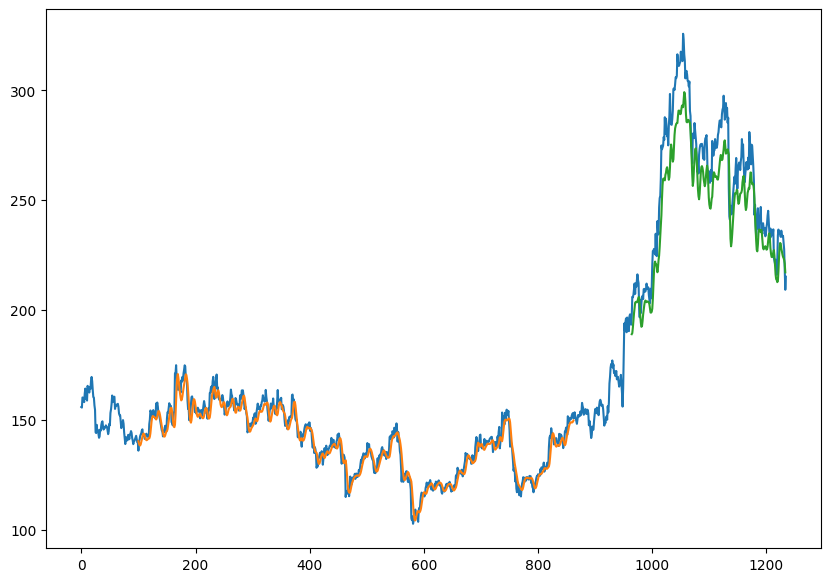

In [57]:
look_back =100

# shift train predictions for plotting 
trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift test prediction for plotting
testPredictPlot = np.empty_like(close_srt)

testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1,:]= test_predict
#plot baseline and predictions
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [58]:
##Prediction for Next 30 Days
len(test_data)

371

In [60]:
pred_input = test_data[271:].reshape(1,-1)
pred_input.shape

(1, 100)

In [61]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [62]:
temp_input

[0.6275212909009413,
 0.6205737337516808,
 0.6492604213357238,
 0.6367099955177049,
 0.6315553563424474,
 0.6476916181084715,
 0.6613626176602418,
 0.680636485880771,
 0.6956521739130435,
 0.7082025997310621,
 0.694083370685791,
 0.7254594352308381,
 0.7465262214253696,
 0.7198565665620797,
 0.6839982070820259,
 0.722097714029583,
 0.7310623038995965,
 0.7371134020618557,
 0.7364410578216045,
 0.7218735992828327,
 0.739354549529359,
 0.7483191393993724,
 0.7850739578664276,
 0.7597489914836395,
 0.7740923352756612,
 0.7368892873151054,
 0.7090990587180637,
 0.6972209771402957,
 0.714701927386822,
 0.7254594352308381,
 0.7382339757956073,
 0.7303899596593455,
 0.7229941730165843,
 0.7471985656656208,
 0.7252353204840878,
 0.7994173016584492,
 0.7828328103989242,
 0.7557149260421334,
 0.7335275661138503,
 0.7736441057821604,
 0.7714029583146571,
 0.7492155983863737,
 0.7285970416853427,
 0.7003585835948003,
 0.6302106678619452,
 0.6510533393097264,
 0.6095921111609144,
 0.584715374271626

In [64]:
lst_output=[] #predicted 30 days output
n_steps=100
i=0
while (i<30): #for 30 days- change according to the number of days you want

    if (len(temp_input)>100):
        #print(temp_input)
        pred_input=np.array(temp_input[1:]) #for last 100 data
        print("{} day input {}".format(i,pred_input))
        pred_input = pred_input.reshape(1,-1)
        pred_input= pred_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat = model.predict(pred_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1,n_steps,1))
        yhat = model.predict(pred_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.46539265]
101
1 day input [0.62057373 0.64926042 0.63671    0.63155536 0.64769162 0.66136262
 0.68063649 0.69565217 0.7082026  0.69408337 0.72545944 0.74652622
 0.71985657 0.68399821 0.72209771 0.7310623  0.7371134  0.73644106
 0.7218736  0.73935455 0.74831914 0.78507396 0.75974899 0.77409234
 0.73688929 0.70909906 0.69722098 0.71470193 0.72545944 0.73823398
 0.73038996 0.72299417 0.74719857 0.72523532 0.7994173  0.78283281
 0.75571493 0.73352757 0.77364411 0.77140296 0.7492156  0.72859704
 0.70035858 0.63021067 0.65105334 0.60959211 0.58471537 0.609368
 0.63043478 0.64388167 0.6017481  0.61160914 0.62572837 0.62550426
 0.64657104 0.59614523 0.59524877 0.59166293 0.61340206 0.6048857
 0.59928283 0.60354101 0.58673241 0.5912147  0.60466159 0.61272972
 0.62909009 0.63872703 0.61810847 0.59524877 0.57530255 0.60242044
 0.58583595 0.5912147  0.59771403 0.59009413 0.60085164 0.5425818
 0.53675482 0.53070372 0.53922008 0.5349619  0.50806813 0.53787539
 0.58852532 0.60040341 0.59345585 0.5

In [65]:
##Ploting last 130 days closing price
day_new= np.arange(1,101)
day_pred = np.arange(101,131)

In [66]:
len(close_srt)

1235

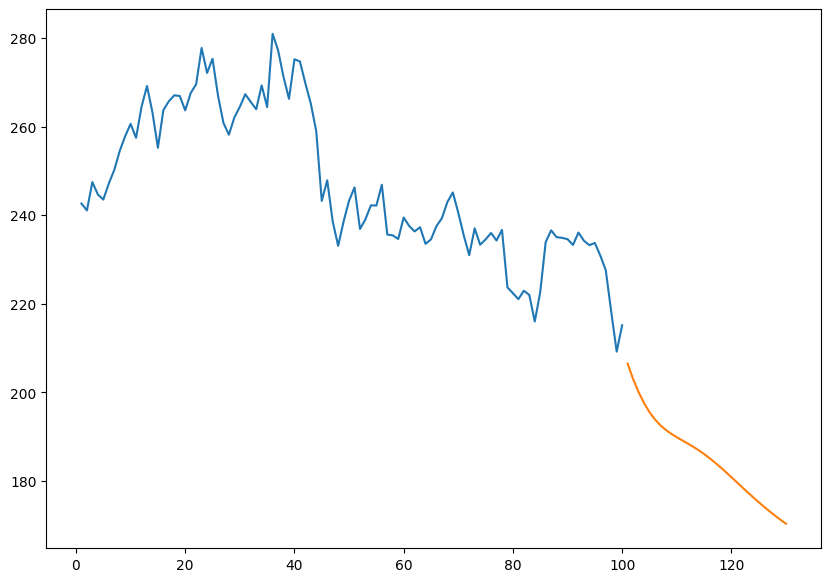

In [68]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(close_srt[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [69]:
##Appending in a list is done to make continuous graph
df3 = close_srt.tolist()
#adding specified list of predicted 30 days output to the end of last 100 days output
df3.extend(lst_output)

In [70]:
print(len(df3))

1265


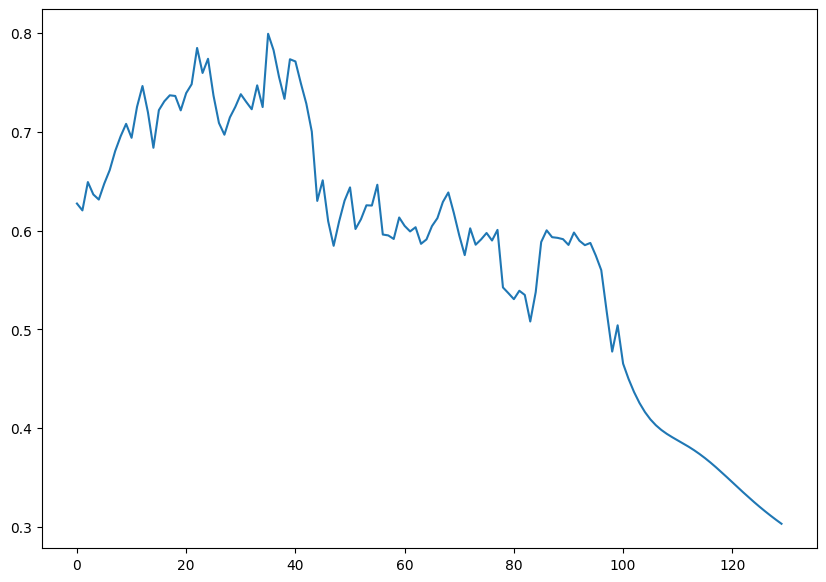

In [71]:
plt.figure(figsize=(10,7))
plt.plot(df3[1135:]) #latest 100 days output

In [72]:
##Plotting the graph with predicted 30 days output
df3 = scaler.inverse_transform(df3).tolist() #undoing scaling of df3

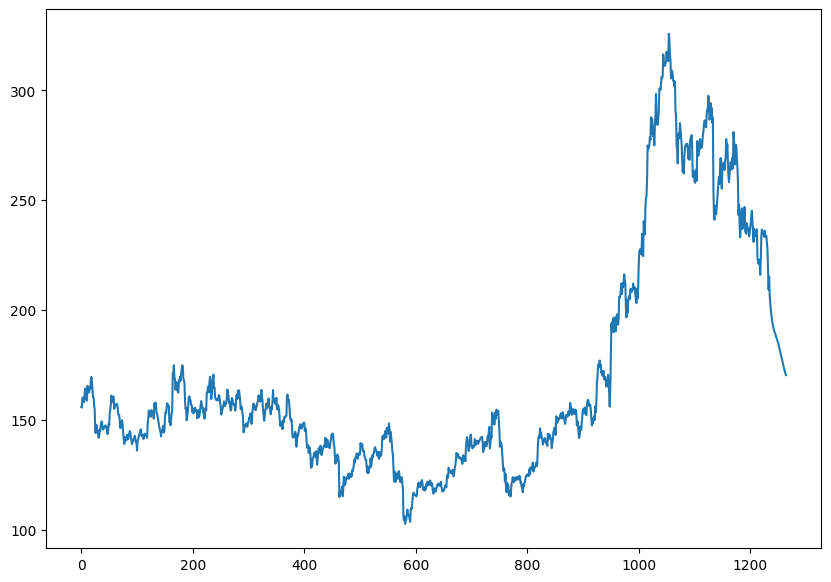

In [73]:
plt.figure(figsize=(10,7))
plt.plot(df3)